In [2]:
import pandas as pd
import numpy as np
import sqlite3
from tqdm.notebook import tqdm

In [ ]:
db = sqlite3.connect('NPPES_Data_Dissemination.sqlite')

chunks = pd.read_csv('data/DocGraph_Hop_Teaming_2018.csv', chunksize = 10000)
hop = []
for chunk in chunks:
    chunk = chunk[(chunk['transaction_count'] >= 50) & (chunk['average_day_wait'] < 50)]
    chunk.to_sql('hop', db, if_exists = 'append', index = False)

In [ ]:
db = sqlite3.connect('NPPES_Data_Dissemination.sqlite')

cols = ['NPI','Entity Type Code','Provider Organization Name (Legal Business Name)', 'Provider Last Name (Legal Name)','Provider First Name', 'Provider Middle Name','Provider Name Prefix Text',  'Provider Name Suffix Text','Provider Credential Text', 
        'Provider First Line Business Practice Location Address', 
        'Provider Second Line Business Practice Location Address',
        'Provider Business Practice Location Address City Name',
        'Provider Business Practice Location Address State Name',
        'Provider Business Practice Location Address Postal Code', 
        'Healthcare Provider Taxonomy Code_1', 
        'Healthcare Provider Primary Taxonomy Switch_1', 
        'Healthcare Provider Taxonomy Code_2', 'Healthcare Provider Primary Taxonomy Switch_2', 'Healthcare Provider Taxonomy Code_3', 'Healthcare Provider Primary Taxonomy Switch_3', 'Healthcare Provider Taxonomy Code_4', 'Healthcare Provider Primary Taxonomy Switch_4', 'Healthcare Provider Taxonomy Code_5', 'Healthcare Provider Primary Taxonomy Switch_5', 'Healthcare Provider Taxonomy Code_6', 'Healthcare Provider Primary Taxonomy Switch_6', 'Healthcare Provider Taxonomy Code_7', 'Healthcare Provider Primary Taxonomy Switch_7', 'Healthcare Provider Taxonomy Code_8', 'Healthcare Provider Primary Taxonomy Switch_8', 'Healthcare Provider Taxonomy Code_9', 'Healthcare Provider Primary Taxonomy Switch_9', 'Healthcare Provider Taxonomy Code_10', 'Healthcare Provider Primary Taxonomy Switch_10', 'Healthcare Provider Taxonomy Code_11', 'Healthcare Provider Primary Taxonomy Switch_11', 'Healthcare Provider Taxonomy Code_12', 'Healthcare Provider Primary Taxonomy Switch_12', 'Healthcare Provider Taxonomy Code_13', 'Healthcare Provider Primary Taxonomy Switch_13', 'Healthcare Provider Taxonomy Code_14', 'Healthcare Provider Primary Taxonomy Switch_14', 'Healthcare Provider Taxonomy Code_15', 'Healthcare Provider Primary Taxonomy Switch_15']

nppes_chunks = pd.read_csv('data/npidata_pfile_20050523-20230212.csv', usecols=cols, iterator=True, chunksize=100000, low_memory=False)
var_cols = ['Healthcare Provider Taxonomy Code', 'Healthcare Provider Primary Taxonomy Switch']

nppes_full = []

state_list = ['TN', 'AR', 'NC', 'MS', 'GA']
nppes = pd.DataFrame()
id_cols = ['NPI','Entity Type Code','Provider Organization Name (Legal Business Name)', 'Provider Last Name (Legal Name)','Provider First Name', 'Provider Middle Name','Provider Name Prefix Text', 'Provider Name Suffix Text','Provider Credential Text', 'Provider First Line Business Practice Location Address', 'Provider Second Line Business Practice Location Address','Provider Business Practice Location Address City Name','Provider Business Practice Location Address State Name','Provider Business Practice Location Address Postal Code']

for chunk in nppes_chunks:
    filtered_chunk = chunk[chunk['Provider Business Practice Location Address State Name'].isin(state_list)]
    filtered_chunk = pd.wide_to_long(filtered_chunk, var_cols, i = id_cols , j = "", sep = "_")
    
    nppes = pd.concat([nppes, filtered_chunk])

nppes = nppes.reset_index()
nppes.columns = nppes.columns.str.replace(" ", "")
nppes = nppes.drop(columns = "")


nppes.to_sql('nppes', con = db, if_exists = 'append', index = False) 


db.close() 

In [ ]:
db.close()

In [2]:
#db = sqlite3.connect('./NPPES_Data_Dissemination.sqlite')
query = "SELECT * FROM hop"

with sqlite3.connect('./NPPES_Data_Dissemination.sqlite') as db: 
    hop_sqlite = pd.read_sql(query, db)
    
hop_sqlite

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1508085911,1730166125,58,67,23.925,43.923
1,1508167040,1730166125,51,51,28.196,52.876
2,1508863549,1730166125,340,391,18.302,42.422
3,1508867870,1730166125,50,79,12.658,26.402
4,1508011040,1730166224,132,145,8.579,28.053
...,...,...,...,...,...,...
34176933,1417037664,1497939599,36,106,19.330,42.407
34176934,1417194903,1497939599,22,70,16.629,30.598
34176935,1417406372,1497939599,21,65,20.123,37.750
34176936,1417064825,1497940605,75,79,10.418,34.744


In [3]:
#db = sqlite3.connect('data/NPPES_Data_Dissemination.sqlite')
query = "SELECT * FROM nppes"

with sqlite3.connect('./NPPES_Data_Dissemination.sqlite') as db: 
    nppes_sqlite = pd.read_sql(query, db)
    
nppes_sqlite

,NPI,EntityTypeCode,ProviderOrganizationName(LegalBusinessName),ProviderLastName(LegalName),ProviderFirstName,ProviderMiddleName,ProviderNamePrefixText,ProviderNameSuffixText,ProviderCredentialText,ProviderFirstLineBusinessPracticeLocationAddress,ProviderSecondLineBusinessPracticeLocationAddress,ProviderBusinessPracticeLocationAddressCityName,ProviderBusinessPracticeLocationAddressStateName,ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,HealthcareProviderPrimaryTaxonomySwitch
0,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,183500000X,Y
1,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
2,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
3,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
4,1750384210,1.0,None,GILMER,CARISSIA,None,None,None,PHARMD,1410 S 4TH ST,None,NASHVILLE,AR,718523009,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760360,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None
9760361,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None
9760362,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None
9760363,1104850130,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,TN,37205,None,None


In [17]:
provider_query = "SELECT NPI, ProviderFirstName, [ProviderLastName(LegalName)], ProviderNamePrefixText, ProviderNameSuffixText, ProviderCredentialText, HealthcareProviderTaxonomyCode FROM [NPPES] WHERE EntityTypeCode = 1 AND ProviderBusinessPracticeLocationAddressCityName = 'NASHVILLE' AND ProviderBusinessPracticeLocationAddressStateName = 'TN' AND HealthcareProviderPrimaryTaxonomySwitch = 'Y' AND HealthcareProviderTaxonomyCode NOT NULL GROUP BY NPI, NPI, ProviderFirstName, [ProviderLastName(LegalName)], ProviderNamePrefixText, ProviderNameSuffixText, ProviderCredentialText, HealthcareProviderTaxonomyCode"

provider = pd.read_sql(provider_query, db)

provider

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderNamePrefixText,ProviderNameSuffixText,ProviderCredentialText,HealthcareProviderTaxonomyCode
0,1003000282,ROSIE,BLAKEMORE,None,None,FNP,363LF0000X
1,1003007923,CLYDE,RAMEY,None,None,None,171M00000X
2,1003009549,RAMUNE,SILEIKYTE,None,None,None,390200000X
3,1003010588,ENGLISH,FLACK,None,None,MD,2080P0202X
4,1003013947,ROBERT,OTTO,DR.,None,M.D.,207X00000X
...,...,...,...,...,...,...,...
19502,1992987085,SUSANNE,HORTON,None,None,CRNA,367500000X
19503,1992987572,KIMBERLY,ANDERSON,None,None,None,2255A2300X
19504,1992987671,MARIAN,MORGAN,None,None,RN,363LF0000X
19505,1992992697,KARA,COLE,None,None,PA,363AS0400X


In [18]:
taxonomy_nucc = pd.read_csv('data/nucc_taxonomy_230.csv', encoding= 'unicode_escape')

In [19]:
provider = provider.merge(taxonomy_nucc, left_on = "HealthcareProviderTaxonomyCode", right_on = "Code")

provider

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderNamePrefixText,ProviderNameSuffixText,ProviderCredentialText,HealthcareProviderTaxonomyCode,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,1003000282,ROSIE,BLAKEMORE,None,None,FNP,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
1,1003111071,GOLD,NWOKOCHAH,None,None,None,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
2,1003215997,PRINCESS,SHELTON,None,None,FNP-BC,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
3,1003232927,EMILY,HIATT,MRS.,None,FNP-BC,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
4,1003245689,JOCELYN,DECKER,None,None,FNP,363LF0000X,363LF0000X,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,Definition to come...,NaN,Family Nurse Practitioner,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19502,1972778090,ROBERT,HUNLEY,None,JR.,COTA/L,225XR0403X,225XR0403X,"Respiratory, Developmental, Rehabilitative and...",Occupational Therapist,Driving and Community Mobility,Occupational therapists can optimize and prolo...,Source: The Guide to Occupational Therapy Prac...,Driving and Community Mobility Occupational Th...,Individual
19503,1982651360,JENNIFER,ERICH,None,None,MD,207PH0002X,207PH0002X,Allopathic & Osteopathic Physicians,Emergency Medicine,Hospice and Palliative Medicine,An emergency medicine physician with special k...,Source: American Academy of Hospice and Pallia...,Hospice and Palliative Medicine (Emergency Med...,Individual
19504,1982909370,JESSICA,EASLEY,None,None,None,171WH0202X,171WH0202X,Other Service Providers,Contractor,Home Modifications,Definition to come...,NaN,Home Modifications Contractor,Individual
19505,1992223804,TINA,RAY,None,None,None,364SG0600X,364SG0600X,Physician Assistants & Advanced Practice Nursi...,Clinical Nurse Specialist,Gerontology,Definition to come...,NaN,Gerontology Clinical Nurse Specialist,Individual


In [7]:
provider.to_sql('provider', db, if_exists = 'replace', index = False)

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [31]:
facility_query = "SELECT NPI, [ProviderOrganizationName(LegalBusinessName)], ProviderBusinessPracticeLocationAddressPostalCode, HealthcareProviderTaxonomyCode FROM [nppes] WHERE EntityTypeCode = 2 AND ProviderBusinessPracticeLocationAddressCityName = 'NASHVILLE' AND ProviderBusinessPracticeLocationAddressStateName = 'TN' AND HealthcareProviderPrimaryTaxonomySwitch = 'Y' GROUP BY NPI, 'ProviderOrganizationName(LegalBusinessName)', ProviderBusinessPracticeLocationAddressPostalCode, HealthcareProviderTaxonomyCode"
    
facility_sqlite = pd.read_sql(facility_query, db)
    
facility_sqlite

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode
0,1003046509,JARMON D & Q TRANSORT,372071308,343900000X
1,1003085754,DOHNAL CHIROPRACTIC INC.,372116810,111N00000X
2,1003107673,"MEHARRY MEDICAL COLLEGE, SCHOOL OF DENTISTRY",37208,261QD0000X
3,1003118126,"KEISER CHIROPRACTIC NEUROLOGY CENTER, PC",372143530,111NN0400X
4,1003152208,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",372031534,207VX0201X
...,...,...,...,...
2979,1992972087,INTERNAL MEDICINE ASSOCIATES OF SOUTHERN HILLS...,372114880,207R00000X
2980,1992972772,TAXI USA OF TENNESSEE LLC,37210,344600000X
2981,1992978746,"HAL SCHOFIELD MD, PC",372122804,2084P0800X
2982,1992987101,"RENAISSANCE WOMEN'S CENTER, PC",372281511,261QM2500X


In [33]:
facility = facility_sqlite.merge(taxonomy_nucc, left_on = "HealthcareProviderTaxonomyCode", right_on = "Code")
facility = facility[facility['Grouping'] == 'Hospitals']
facility

,NPI,ProviderOrganizationName(LegalBusinessName),ProviderBusinessPracticeLocationAddressPostalCode,HealthcareProviderTaxonomyCode,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
185,1003211145,MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDE...,372320005,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
186,1164609319,VANDERBILT MEDICAL CENTER,372320034,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
187,1255577466,MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL,372320005,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
188,1326224015,VANDERBILT CHILDRENS HOSPITAL,372320005,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
189,1609056399,VANDERBILT CHILDREN'S,372320001,282NC2000X,282NC2000X,Hospitals,General Acute Care Hospital,Children,Definition to come...,NaN,Children's Hospital,Non-Individual
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,1700950284,VANDERBILT UNIVERSITY MEDICAL CENTER,372320014,282NC0060X,282NC0060X,Hospitals,General Acute Care Hospital,Critical Access,Definition to come.,[7/1/2003: new],Critical Access Hospital,Non-Individual
2913,1568477990,DEPARTMENT OF VETERANS AFFAIRS NASHVILLE,372122637,286500000X,286500000X,Hospitals,Military Hospital,NaN,A health care facility operated by the Departm...,NaN,Military Hospital,Non-Individual
2935,1699436626,"SAINT THOMAS REHABILITATION HOSPITAL, LLC",372031846,283X00000X,283X00000X,Hospitals,Rehabilitation Hospital,NaN,A hospital or facility that provides health-re...,Source: Joint Commission on Accreditation of H...,Rehabilitation Hospital,Non-Individual
2936,1972749406,VANDERBILT ORTHOPAEDIC INSTITUTE,372320001,283X00000X,283X00000X,Hospitals,Rehabilitation Hospital,NaN,A hospital or facility that provides health-re...,Source: Joint Commission on Accreditation of H...,Rehabilitation Hospital,Non-Individual


In [10]:
facility.to_sql('facility', db, if_exists = 'replace', index = False)

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [6]:
specialist_query = "SELECT hop.from_npi, hop.to_npi, hop.patient_count, hop.transaction_count, ProviderFirstName AS First_Name, [ProviderLastName(LegalName)] AS Last_Name, [ProviderOrganizationName(LegalBusinessName)] AS Hospital_Name, provider.Classification FROM provider INNER JOIN hop ON provider.NPI = hop.from_npi LEFT JOIN facility ON hop.to_npi = facility.NPI ORDER BY hop.patient_count DESC;"




specialist_test = pd.read_sql(specialist_query, db)

specialist_test

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification
0,1093753303,1003863580,127792,234741,DEREK,WELCH,None,Pathology
1,1093753303,1124075635,124782,227691,DEREK,WELCH,None,Pathology
2,1093753303,1235186800,111956,203632,DEREK,WELCH,None,Pathology
3,1093753303,1376548271,10982,13287,DEREK,WELCH,None,Pathology
4,1093753303,1861478489,10368,12780,DEREK,WELCH,None,Pathology
...,...,...,...,...,...,...,...,...
63906,1184711293,1104202761,11,132,HELEN,HATFIELD,None,Nurse Practitioner
63907,1346765476,1124443403,11,88,HEATHER,CONLEY,None,Nurse Practitioner
63908,1023253549,1245274778,11,50,RHETT,BRUNER,None,Chiropractor
63909,1215250295,1578596961,11,115,SUNDAY,OGUNDE,None,Internal Medicine


In [12]:
specialist_test.to_csv(r'data/neo4j.csv', index=False)

In [13]:
neo4j_output = pd.read_csv('data/neo4j_output.csv', encoding= 'unicode_escape')

In [15]:
neo4j_output.head()

,ï»¿number,communityId
0,1164785416,18083
1,1073922167,18083
2,1376949206,18071
3,1366465098,18071
4,1528051448,18067


In [16]:
neo4j_output.to_sql('neo4j_output', db, if_exists = 'replace', index = False)

In [4]:
query = "SELECT * FROM neo4j_output"

with sqlite3.connect('./NPPES_Data_Dissemination.sqlite') as db: 
    neo4j_output = pd.read_sql(query, db)
    
neo4j_output

,ï»¿number,communityId
0,1164785416,18083
1,1073922167,18083
2,1376949206,18071
3,1366465098,18071
4,1528051448,18067
...,...,...
18083,1609051895,10
18084,1144261447,10
18085,1295990174,10
18086,1831373810,10


In [13]:
neo4j_output.columns = ['NPI', 'communityId']
neo4j_output

,NPI,communityId
0,1164785416,18083
1,1073922167,18083
2,1376949206,18071
3,1366465098,18071
4,1528051448,18067
...,...,...
18083,1609051895,10
18084,1144261447,10
18085,1295990174,10
18086,1831373810,10


In [14]:
# modify this chunk of code to pull columns from other tables to produce new table with what you want
neo4j_analysis = pd.merge(specialist_test, neo4j_output, how="left", left_on='from_npi', right_on='NPI')
neo4j_analysis

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,NPI,communityId
0,1093753303,1003863580,127792,234741,DEREK,WELCH,None,Pathology,1093753303,4442
1,1093753303,1124075635,124782,227691,DEREK,WELCH,None,Pathology,1093753303,4442
2,1093753303,1235186800,111956,203632,DEREK,WELCH,None,Pathology,1093753303,4442
3,1093753303,1376548271,10982,13287,DEREK,WELCH,None,Pathology,1093753303,4442
4,1093753303,1861478489,10368,12780,DEREK,WELCH,None,Pathology,1093753303,4442
...,...,...,...,...,...,...,...,...,...,...
63906,1184711293,1104202761,11,132,HELEN,HATFIELD,None,Nurse Practitioner,1184711293,4384
63907,1346765476,1124443403,11,88,HEATHER,CONLEY,None,Nurse Practitioner,1346765476,4377
63908,1023253549,1245274778,11,50,RHETT,BRUNER,None,Chiropractor,1023253549,4413
63909,1215250295,1578596961,11,115,SUNDAY,OGUNDE,None,Internal Medicine,1215250295,4939


In [36]:
neo4j_analysis_new = pd.merge(neo4j_analysis, provider[['NPI', 'Specialization']], how="left")
neo4j_analysis_new

,from_npi,to_npi,patient_count,transaction_count,First_Name,Last_Name,Hospital_Name,Classification,NPI,communityId,Specialization
0,1093753303,1003863580,127792,234741,DEREK,WELCH,None,Pathology,1093753303,4442,Anatomic Pathology & Clinical Pathology
1,1093753303,1124075635,124782,227691,DEREK,WELCH,None,Pathology,1093753303,4442,Anatomic Pathology & Clinical Pathology
2,1093753303,1235186800,111956,203632,DEREK,WELCH,None,Pathology,1093753303,4442,Anatomic Pathology & Clinical Pathology
3,1093753303,1376548271,10982,13287,DEREK,WELCH,None,Pathology,1093753303,4442,Anatomic Pathology & Clinical Pathology
4,1093753303,1861478489,10368,12780,DEREK,WELCH,None,Pathology,1093753303,4442,Anatomic Pathology & Clinical Pathology
...,...,...,...,...,...,...,...,...,...,...,...
63906,1184711293,1104202761,11,132,HELEN,HATFIELD,None,Nurse Practitioner,1184711293,4384,Psychiatric/Mental Health
63907,1346765476,1124443403,11,88,HEATHER,CONLEY,None,Nurse Practitioner,1346765476,4377,Adult Health
63908,1023253549,1245274778,11,50,RHETT,BRUNER,None,Chiropractor,1023253549,4413,NaN
63909,1215250295,1578596961,11,115,SUNDAY,OGUNDE,None,Internal Medicine,1215250295,4939,Nephrology


In [45]:
pd.options.display.float_format = '{:.2f}'.format

<AxesSubplot:xlabel='communityId'>

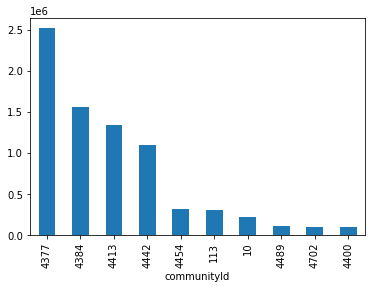

In [60]:
neo4j_analysis_new.groupby(['communityId'])['patient_count'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')

<AxesSubplot:ylabel='communityId,Hospital_Name'>

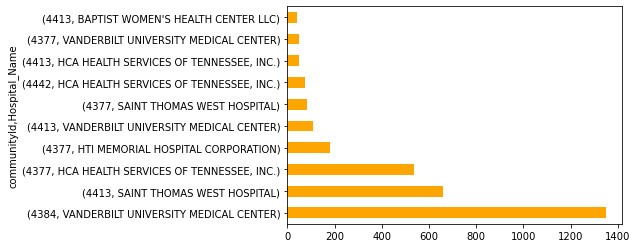

In [70]:
neo4j_analysis_new.groupby(['communityId', 'Hospital_Name'])['NPI'].count().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'orange')

<AxesSubplot:xlabel='from_npi'>

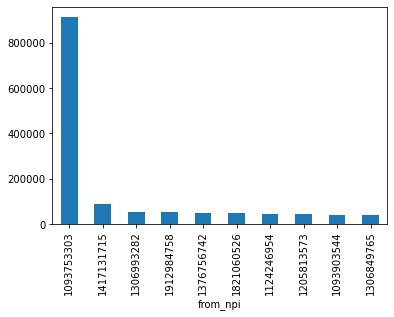

In [58]:
neo4j_analysis_new.groupby(['from_npi'])['patient_count'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')